In [ ]:
import pandas as pd

df = pd.read_csv("../data/customers.csv")
df.head()

,customer_id,subscription_tier,region,tenure_months,monthly_spend
0,C001,Basic,NaN,2,25
1,C002,Basic,EU,5,30
2,C003,Basic,APAC,1,20
3,C004,Basic,NaN,8,35
4,C005,Basic,EU,12,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        40 non-null     object
 1   subscription_tier  40 non-null     object
 2   region             25 non-null     object
 3   tenure_months      40 non-null     int64 
 4   monthly_spend      40 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.7+ KB


In [3]:
df.describe()

,tenure_months,monthly_spend
count,40.00000,40.000000
mean,17.80000,73.775000
std,14.51118,37.425816
min,1.00000,20.000000
25%,6.00000,48.000000
50%,14.50000,65.000000
75%,25.75000,91.250000
max,60.00000,160.000000


In [4]:
df["subscription_tier"].value_counts()

subscription_tier
Basic       14
Standard    13
Premium     13
Name: count, dtype: int64

In [5]:
df["region"].value_counts()

region
EU      14
APAC    11
Name: count, dtype: int64

In [6]:
avg_spend = (
  df
  .groupby("subscription_tier")["monthly_spend"]
  .mean()
  .reset_index()
)

avg_spend

,subscription_tier,monthly_spend
0,Basic,40.071429
1,Premium,116.923077
2,Standard,66.923077


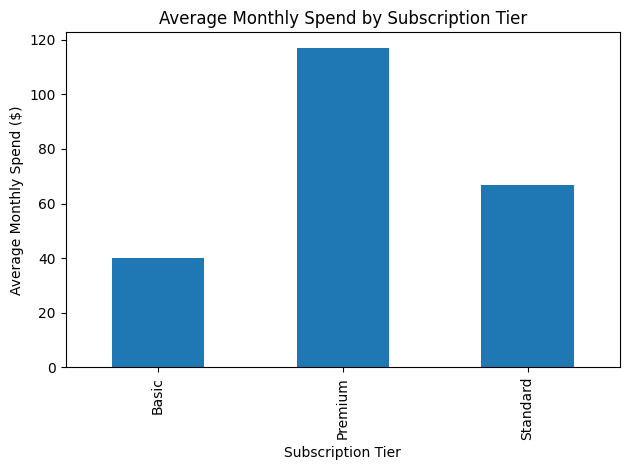

In [ ]:
import matplotlib.pyplot as plt

avg_spend.plot(
  x="subscription_tier",
  y="monthly_spend",
  kind="bar",
  legend=False
)

plt.xlabel("Subscription Tier")
plt.ylabel("Average Monthly Spend ($)")
plt.title("Average Monthly Spend by Subscription Tier")
plt.tight_layout()
plt.show()

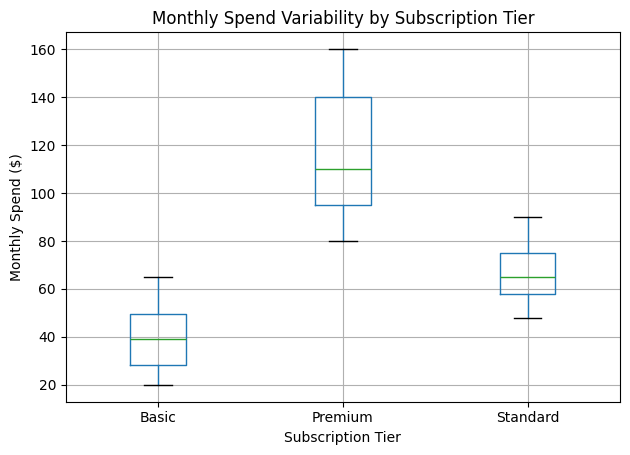

In [8]:
df.boxplot(column="monthly_spend", by="subscription_tier")
plt.xlabel("Subscription Tier")
plt.ylabel("Monthly Spend ($)")
plt.title ("Monthly Spend Variability by Subscription Tier")
plt.suptitle("")
plt.tight_layout()
plt.show()

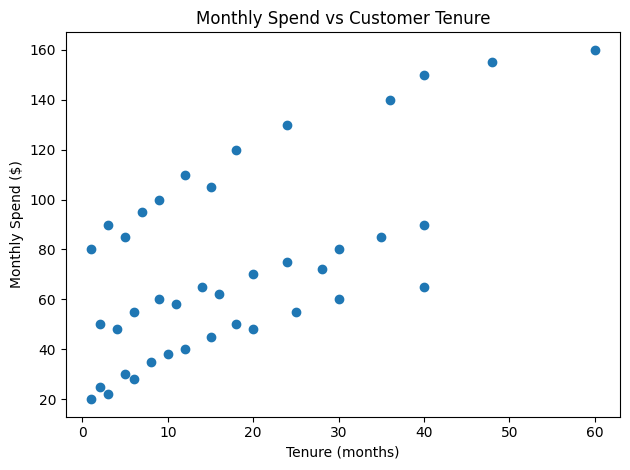

In [9]:
plt.scatter(df["tenure_months"], df["monthly_spend"])
plt.xlabel("Tenure (months)")
plt.ylabel("Monthly Spend ($)")
plt.title("Monthly Spend vs Customer Tenure")
plt.tight_layout()
plt.show()

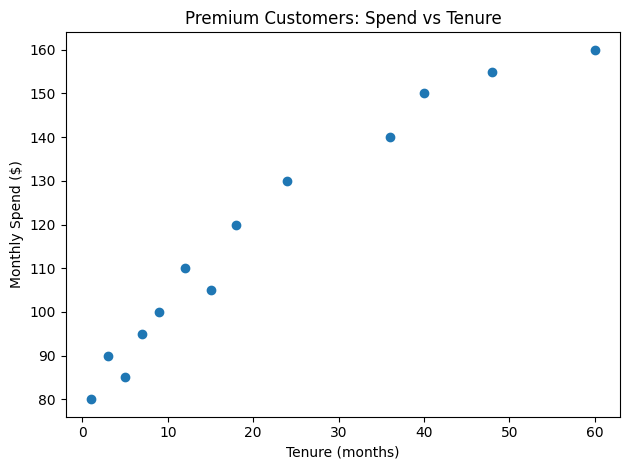

In [10]:
premium = df[df["subscription_tier"] == "Premium"]

plt.scatter(premium["tenure_months"], premium["monthly_spend"])
plt.xlabel("Tenure (months)")
plt.ylabel("Monthly Spend ($)")
plt.title("Premium Customers: Spend vs Tenure")
plt.tight_layout()
plt.show()

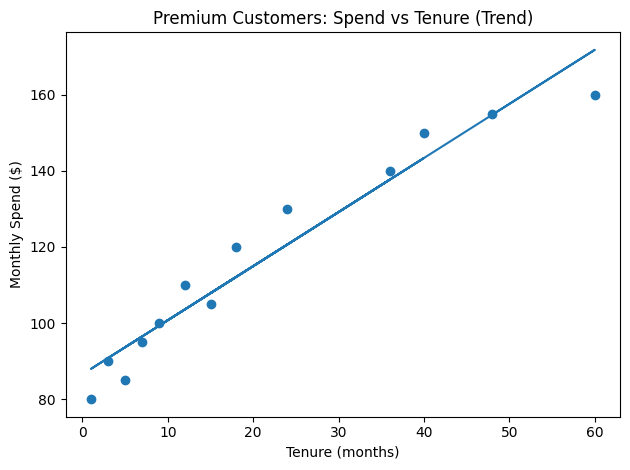

In [ ]:
import numpy as np

x = premium["tenure_months"]
y = premium["monthly_spend"]

m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel("Tenure (months)")
plt.ylabel("Monthly Spend ($)")
plt.title("Premium Customers: Spend vs Tenure (Trend)")
plt.tight_layout()
plt.show()

In [12]:
def tenure_group(months):
  if months < 12:
    return "Short Tenure"
  else:
    return "Long Tenure"
  
df["tenure_group"] = df["tenure_months"].apply(tenure_group)
df.head()

,customer_id,subscription_tier,region,tenure_months,monthly_spend,tenure_group
0,C001,Basic,NaN,2,25,Short Tenure
1,C002,Basic,EU,5,30,Short Tenure
2,C003,Basic,APAC,1,20,Short Tenure
3,C004,Basic,NaN,8,35,Short Tenure
4,C005,Basic,EU,12,40,Long Tenure


In [13]:
premium = df[df["subscription_tier"] == "Premium"]
premium["tenure_group"].value_counts()

tenure_group
Long Tenure     8
Short Tenure    5
Name: count, dtype: int64

In [14]:
premium_avg = (
  premium
  .groupby("tenure_group")["monthly_spend"]
  .mean()
  .reset_index()
)

premium_avg

,tenure_group,monthly_spend
0,Long Tenure,133.75
1,Short Tenure,90.00


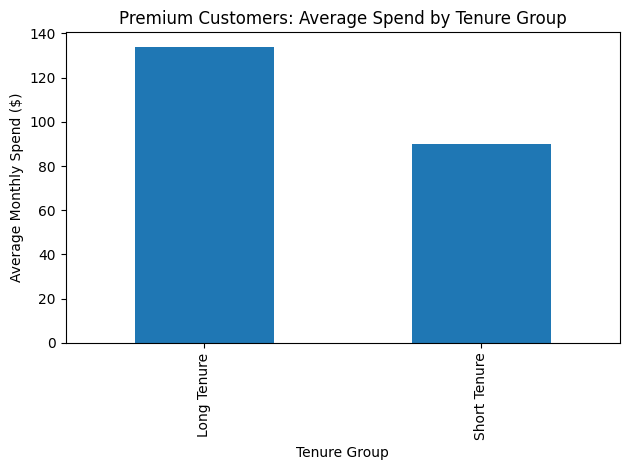

In [ ]:
premium_avg.plot(
  x="tenure_group",
  y="monthly_spend",
  kind="bar",
  legend=False
)

plt.xlabel("Tenure Group")
plt.ylabel("Average Monthly Spend ($)")
plt.title("Premium Customers: Average Spend by Tenure Group")
plt.tight_layout()
plt.show()